# Pratica Dissecação PCAP

Através do SCAPY e Wireshark, realize as atividades a seguir

In [ ]:
!pip install scapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444328 sha256=46a1c936248ac744c68b55465d45d7ca4d320d5a7aebd144241746b41633755a
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [ ]:
#Efetua download do arquivo pcap
!gdown 1WBevnCjhCJ1lQJuyTKMDVD1LbgHmKxvN

Downloading...
From: https://drive.google.com/uc?id=1WBevnCjhCJ1lQJuyTKMDVD1LbgHmKxvN
To: /content/sample.pcapng
100% 12.2M/12.2M [00:00<00:00, 86.7MB/s]


In [ ]:
# Espaço para realizar os exemplos com o professor =)
import os
from scapy.all import *

packets = sniff(offline='/content/sample.pcapng')

In [ ]:
req=0
rep=0
for i in range(1,len(packets)):
  if packets[i].haslayer(ARP):
    if packets[i]['ARP'].op == 1:
      req+=1
    else:
      rep+=1

print(f'{req} packets sao request e {rep} sao replies')

In [ ]:
tcp = 0

for pkt in packets:
  if TCP in pkt:
    tcp +=1
print(tcp)

In [ ]:
http = 0
i = 0
for i in range(1,len(packets)):
  if packets[i].haslayer(TCP):
    if packets[i]['TCP'].flags.PA == True:
      http+=1
    else:
      pass
print(http)

2847


In [ ]:
packets[1536].show()

In [ ]:
packets[1538].show()

### Pratica 1 - Interpretação de Protocolos

Considerando o PCAP (/home/dados/ParsePCAP/sample.pcapng), determine as informações solicitadas

1. Quantidade de ARP Requests
2. Quantidade de ARP Replies
3. Quantidade de pacotes TCP
4. Quantidade de pacotes relacionados a HTTP
5. Quantidade de queries HTTP get
6. Quantidade de novas conexões SSH
7. Quantidade de requisições DNS
8. Usuários logados em sessão telnet
9. Quantidade de protocolos de aplicação distintos
10. Ataques de rede

In [ ]:
import os
from scapy.all import *

packets = sniff(offline='/content/sample.pcapng')

In [ ]:
# 1. Quantidade de ARP Requests


In [ ]:
req=0
for pkt in packets:
  if ARP in pkt:
    if pkt.op == 1:
      req+=1

print(f'{req} packets sao request ')

88 packets sao request 


In [ ]:
# 2. Quantidade de ARP Replies


In [ ]:
rep=0
for pkt in packets:
  if ARP in pkt:
    if pkt.op == 2:
      rep +=1
print(f'{rep} packets sao replies')

81 packets sao replies


In [ ]:
# 3. Quantidade de pacotes TCP


In [ ]:
tcp = 0

for pkt in packets:
  if TCP in pkt:
    tcp +=1
print(tcp, 'Pacotes tcp')

8374 Pacotes tcp


In [ ]:
# 4. Quantidade de pacotes relacionados a HTTP


In [ ]:
packets[8175].show()

In [ ]:

http = 0

for pkt in packets:
    if TCP in pkt and pkt[TCP].dport == 8080:
        http += 1

print(http)


172


In [ ]:
# 5. Quantidade de queries HTTP get


In [ ]:
# 6. Quantidade de novas conexões SSH


In [ ]:
# 7. Quantidade de requisições DNS


In [ ]:
dns=0

for pkt in packets:
  if DNS in pkt:
    if pkt[DNS].qr == 0:
      dns+=1
dns

970

In [ ]:
# 8. Usuários logados em sessão telnet


In [ ]:
packets[23368]['Raw'].show()

###[ Raw ]### 
  load      = 'c'



In [ ]:
# 9. Quantidade de protocolos de aplicação distintos


In [ ]:
# 10. Ataques de rede

### Pratica 2 - Visualização

Considerando o PCAP (/home/dados/ParsePCAP/sample.pcapng), gere os gráficos relacionados as seguintes informações

1. Gráfico com a relação entre ARP Request vs. ARP Reply
2. Gráfico com a relação entre SYN vs. SYN/ACK
3. Gráfico com a relação entre a quantidade de mensagens ICMP vs. TCP vs. UDP
4. Histograma do tamanho das conexões HTTP
5. Gráfico com a quantidade de mensagens por protocolo de aplicação
6. Gráfico com a quantidade de DNS queries efetuadas por IP
7. Histograma do tamanho das mensagens de DNS queries
8. Histograma do tamanho das mensagens de ICMP
9. Gráfico com a ocorrencia de cada protocolo de aplicação
10. Gráfico com a ocorrencia dos caracteres (0 a 255) no payload de comunicações HTTP
11. Gráfico com a ocorrencia dos caracteres (0 a 255) no payload de comunicações SSH

In [ ]:
import os
from scapy.all import *

packets = sniff(offline='/content/sample.pcapng')

In [ ]:
# 1. Gráfico com a relação entre ARP Request vs. ARP Reply



<BarContainer object of 2 artists>

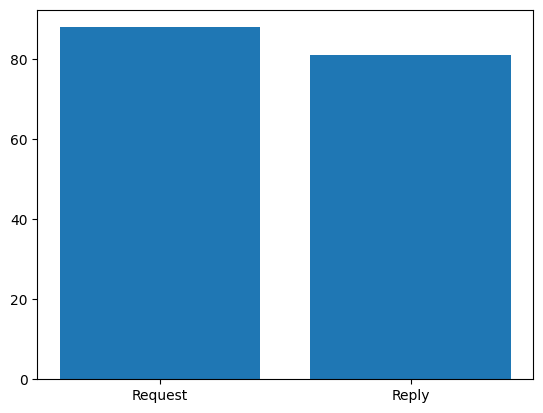

In [ ]:
import matplotlib.pyplot as plt


req=0
rep=0
for pkt in packets:
  if ARP in pkt:
    if pkt.op == 1:
      req+=1
    else:
      rep+=1
plt.bar(['Request','Reply'],[req,rep])


In [ ]:
# 2. Gráfico com a relação entre SYN vs. SYN/ACK


373 312


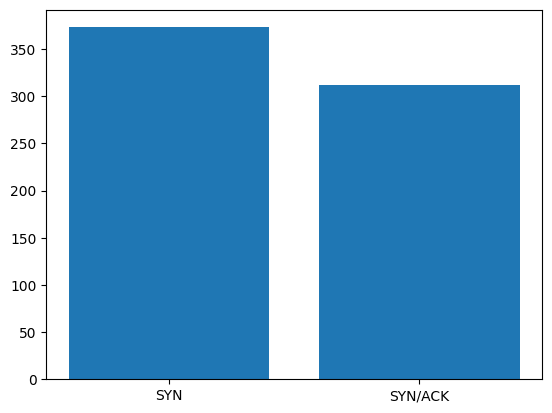

In [ ]:
import matplotlib.pyplot as plt

syn=0
syn_ac=0

for pkt in packets:
  if TCP in pkt:
    if pkt[TCP].flags == 'S':
      syn+=1
    elif pkt[TCP].flags == 'SA':
      syn_ac+=1

plt.bar(['SYN','SYN/ACK'],[syn,syn_ac])

In [ ]:
# 3. Gráfico com a relação entre a quantidade de mensagens ICMP vs. TCP vs. UDP


8374 17442 2447


<BarContainer object of 3 artists>

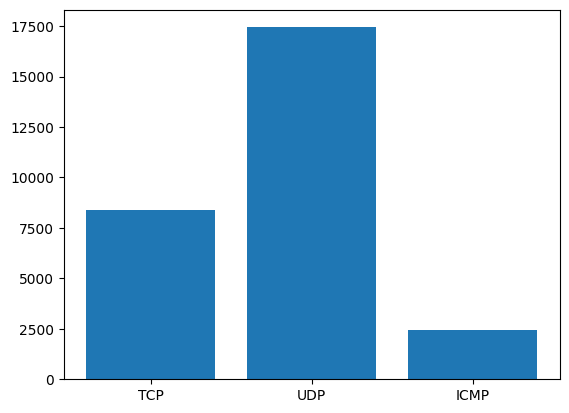

In [ ]:
import matplotlib.pyplot as plt

tcp=0
udp=0
icmp=0
for pkt in packets:
  if TCP in pkt:
    tcp +=1
  elif UDP in pkt:
    udp+=1
  elif ICMP in pkt:
    icmp+=1
print(tcp,udp,icmp)

plt.bar(['TCP','UDP','ICMP'],[tcp,udp,icmp])


In [ ]:
# 4. Histograma do tamanho das conexões HTTP


(array([251.,   4.,   9.,  12.,   8.,   1.,   3.,   3.,  14.,   9.]),
 array([ 54. , 123.3, 192.6, 261.9, 331.2, 400.5, 469.8, 539.1, 608.4,
        677.7, 747. ]),
 <BarContainer object of 10 artists>)

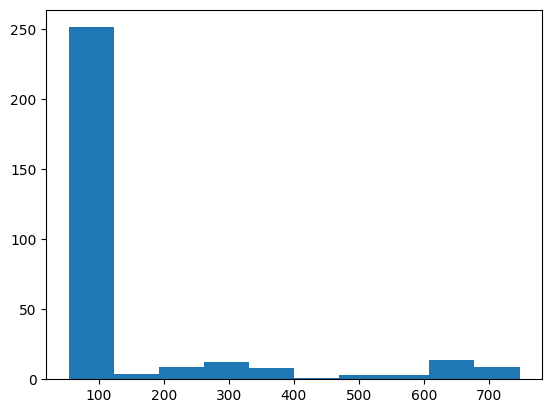

In [ ]:
import matplotlib.pyplot as plt

http=0
tam_pkt=[]
for pkt in packets:
  if TCP in pkt:
    if pkt[TCP].dport == 80 or pkt[TCP].dport == 8080:
      tam_pkt.append(len(pkt))
      http+=1

plt.hist(tam_pkt)


In [ ]:
# 5. Gráfico com a quantidade de mensagens por protocolo de aplicação


In [ ]:
# 6. Gráfico com a quantidade de DNS queries efetuadas por IP


In [ ]:
# 7. Histograma do tamanho das mensagens de DNS queries


In [ ]:
# 8. Histograma do tamanho das mensagens de ICMP


(array([ 417.,  110., 1891.,   12.,    0.,    0.,   15.,    0.,    0.,
           2.]),
 array([ 60. ,  79.4,  98.8, 118.2, 137.6, 157. , 176.4, 195.8, 215.2,
        234.6, 254. ]),
 <BarContainer object of 10 artists>)

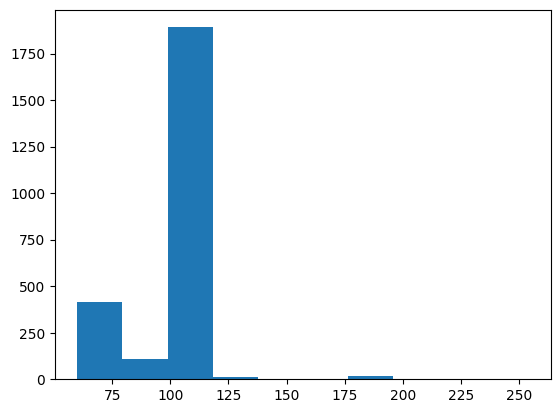

In [ ]:
icmp_tam=[]

for pkt in packets:
  if ICMP in pkt:
    icmp_tam.append(len(pkt))


plt.hist(icmp_tam)

In [ ]:
# 9. Gráfico com a ocorrencia de cada protocolo de aplicação